In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Transfer Function Calibration

In [2]:
#ATTENUATOR CALCULATIONS
ra1 = 51
ra2 = 510000
Gatt =  ra1/(ra1+ra2)
uGatt = np.sqrt((ra2/(ra1+ra2)**2)**2 * (ra1*0.05)**2 + 
                (ra1/(ra1+ra2)**2)**2 * (ra2*0.1)**2)
print('Gatt = ', Gatt , ' +/-',uGatt)

Gatt =  9.999000099990002e-05  +/- 1.117810415488693e-05


In [3]:
#POINT BY POINT TRANSFER FUNCTION MEASUREMENT
freqs4 = np.asarray([0.20289, #kHz
0.39737,
0.5967,
0.80319,
1.039,
1.2475,
1.4007,
1.6248,
1.825,
2.0191,
2.2001,
2.4117,
2.6017,
2.8021,
3.0025,
3.2147,
3.4275,
3.6966,
3.8152,
4.0304,
4.2025,
4.3058,
4.5157,
4.8058,
5.0371,
5.2224,
5.4066,
5.646,
5.7583,
5.9503,
6.3085,
6.46,
6.6387,
6.7663,
6.981,
7.3142,
7.5222,
7.6363,
7.9266,
8.0611,
8.5678,
8.7356,
9.2553,
9.7871,
10.152,
10.714,
10.987,
11.966,
13.138,
13.978,
15.143,
16.063,
16.985,
18.089,
19.335,
20.532,
21.31,
22.025,
24,
25.259,
26.197,
27.122,
28.087,
29.087,
32.602,
32.326,
34.171,
36.028,
37.258,
32.138,
40.35,
45.174,
50.155,
])
vout4 = np.asarray([26.512, #mV
72.387,
129.517,
225.875,
402.17,
574.7,
680.39,
782.52,
829.52,
851.4,
860.12,
863.13,
862.44,
860.11,
856.92,
853.18,
849.45,
844.77,
842.72,
839.29,
835.77,
834.08,
830.75,
826.52,
823.84,
820.46,
818.08,
831.75,
830.87,
829.49,
826.27,
824.87,
823.43,
822.54,
821.16,
818.13,
816.56,
815.85,
813.33,
812.68,
807.55,
805.76,
799.59,
791.9,
785.99,
773.8,
767.53,
737.01,
685.81,
639.14,
562.55,
497.44,
430.48,
354.48,
279.37,
219.544,
187.181,
161.357,
107.7,
83.871,
69.982,
58.784,
49.384,
41.336,
30.508,
24.581,
18.871,
14.968,
13.08,
11.985,
9.931,
7.688,
6.916
])
vin4 = 1.04879 *1000 #mV

uvin4 = vin4 * 0.0026 #mV
ufreqs4 = np.repeat(0.1, len(freqs4))
uvout4 = np.zeros(len(vout4))
for i in range(len(vout4)):
    # +/-0.29 % if less than 20kHz, +/- 0.56 % if greater than 20kHz
    if freqs4[i]<=20:
        uvout4[i] = vout4[i]*0.0029
    else:
        uvout4[i] = vout4[i]*0.0056

In [4]:
# GAIN CALCULATION
G = vout4/(vin4*Gatt)
uG = np.sqrt((1/(Gatt*vin4))**2 * uvin4**2 + 
             (vout4/(Gatt**2 *vin4))**2 * uGatt**2 + 
             (vout4/(Gatt*vin4**2))**2 * uvin4**2)

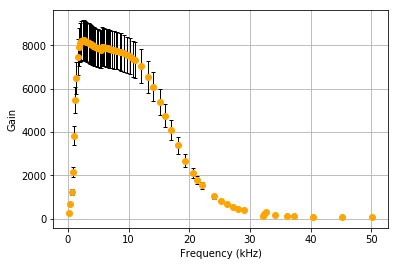

In [5]:
#TRANSFER FUNCTION PLOT
# plt.plot(freqs4,(vout4/(vin4*1000*Gatt)),'o')
plt.errorbar(freqs4, G, yerr= uG, xerr = 0.1 ,
             fmt='o',color='orange',ecolor='black',
             elinewidth = 1,capsize = 2)
plt.grid(True)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Gain")
# plt.savefig("./transferfnctn_error.png", dpi=200)
plt.show()

Transfer Function 
$ \sum _{n=0} ^{N-1} G_n ^{2} (f_{n+1} + f_n)$

In case of arbitrary spaced samples, the two functions trapz and simps are available. They are using Newton-Coates formulas of order 1 and 2 respectively to perform integration. The trapezoidal rule approximates the function as a straight line between adjacent points, while Simpson’s rule approximates the function between three adjacent points as a parabola. (SciPy)

Do scipy uncertainty with min/max uncertainty 

In [6]:
#NUMERICAL INTEGRATION
import scipy.integrate as integrate

gainSquared = G**2
transFuncSimps = integrate.simps(gainSquared, freqs4*1000)

In [7]:
gainSquaredMin = (G-uG)**2
freqsMin = freqs4-ufreqs4
gainSquaredMax = (G+uG)**2
freqsMax = freqs4+ufreqs4

In [8]:
transFuncSimpsMin = integrate.simps(gainSquaredMin, freqsMin*1000)
transFuncSimpsMax = integrate.simps(gainSquaredMax, freqsMax*1000)

In [9]:
utransFuncSimps = max(abs(transFuncSimps - transFuncSimpsMin), 
                      abs(transFuncSimps - transFuncSimpsMax))/(2*np.sqrt(len(freqs4)))

In [10]:
#DISCRETE INTEGRATION
transFunc = 0
for i in range(len(gainSquared)-1):
    transFunc += (gainSquared[i])*(freqs4[i+1]-freqs4[i])*1000

In [11]:
# u(\Delta f) = 2*0.1 = 0.2
utransFunc = np.sqrt( np.sum((2*G[:-1]*np.diff(freqs4*1000))**2 *
                             uG[:-1]**2) + np.sum(G**2)**2 * 0.2)

In [12]:
print(transFunc, '+/-', utransFunc)

886270316694.0677 +/- 32726576048.299908


In [13]:
print(transFuncSimps,'+/-', utransFuncSimps)

861794283304.2343 +/- 11926407949.100786


# BOLTZMANN

$ k_B = \frac{V_{noise} ^2}{4TRG^2 \Delta f}$ = $\frac{V_{meas}^2-V_{inst} ^2}{4TRG^2 \Delta f}$ 

In [14]:
#MEASUREMENTS DERIVED FROM 15 MEASUREMENTS WITH TYPE A UNCERTAINTY
vinst = 0.0062052
r1 = 5250.9
v1 = 0.010599133333
t1 = 20.8+273.15
r2 = 34039
v2 = 0.022551133333
t2 = 20.8+273.15
r3 = 148212
v3 = 0.043653933333
t3 = 21.4+273.15
r4 = 74543
v4 = 0.032343866666
t4 = 20.9+273.15

uvinst = 0.0336753/1000
ur1 = r1*0.000035
uv1 = 0.068526/1000
ur2 = r2*0.000035
uv2 = 0.160536/1000
ur3 = r3*0.000035
uv3 = 0.135020/1000
ur4 = r4*0.000035
uv4 = 0.157324/1000

rb = np.asarray([r1,r2,r3,r4])
vb = np.asarray([v1,v2,v3,v4])
tb = np.asarray([t1,t2,t3,t4])
urb = np.asarray([ur1,ur2,ur3,ur4])
uvb = np.asarray([uv1,uv2,uv3,uv4])
utb = np.repeat(0.5,4)

kbsci = np.divide((np.square(vb)-np.square(vinst)),4*tb*rb*transFuncSimps)
kb = np.divide((np.square(vb)-np.square(vinst)),4*tb*rb*transFunc)
print(kbsci)
print(kb)

[1.38772668e-23 1.36279137e-23 1.24072594e-23 1.33353877e-23]
[1.34940198e-23 1.32515531e-23 1.20646095e-23 1.29671057e-23]


In [15]:
# UNCERTAINTY IN BOLTZMANN CONSTANTS
ukb = np.sqrt(((2*vb/(4*tb*rb*transFunc))**2 * np.square(uvb)) +
             ((2*vinst/(4*tb*rb*transFunc))**2 * np.square(uvinst)) +
             (((np.square(vb)-np.square(vinst))/(4*rb*transFunc*np.square(tb)))**2 * np.square(utb)) +
             (((np.square(vb)-np.square(vinst))/(4*tb*transFunc*np.square(rb)))**2 * np.square(urb)) +
             (((np.square(vb)-np.square(vinst))/(4*tb*rb*np.square(transFunc)))**2 * np.square(utransFunc)))

ukbSimps = np.sqrt(((2*vb/(4*tb*rb*transFuncSimps))**2 * np.square(uvb)) +
             ((2*vinst/(4*tb*rb*transFuncSimps))**2 * np.square(uvinst)) +
             (((np.square(vb)-np.square(vinst))/(4*rb*transFuncSimps*np.square(tb)))**2 * np.square(utb)) +
             (((np.square(vb)-np.square(vinst))/(4*tb*transFuncSimps*np.square(rb)))**2 * np.square(urb)) +
             (((np.square(vb)-np.square(vinst))/(4*tb*rb*np.square(transFuncSimps)))**2 * np.square(utransFuncSimps)))            

In [16]:
# NUMERICAL KB
print(kbsci)
print(ukbSimps)

[1.38772668e-23 1.36279137e-23 1.24072594e-23 1.33353877e-23]
[3.43723840e-25 2.83408470e-25 1.89921114e-25 2.29660335e-25]


In [17]:
# DISCRETE KB
print(kb)
print(ukb)

[1.34940198e-23 1.32515531e-23 1.20646095e-23 1.29671057e-23]
[5.70195254e-25 5.30807732e-25 4.52436639e-25 4.96932319e-25]


In [18]:
# AVERAGE KB AND UNCERTAINTY
print(np.mean(kbsci))
print(abs(np.mean(kbsci-ukbSimps)-np.mean(kbsci+ukbSimps))/(2*np.sqrt(4)))

print(np.mean(kb))
print(abs(np.mean(kb-ukb)-np.mean(kb+ukb))/(2*np.sqrt(4)))

1.3311956916332514e-23
1.3083921980873784e-25
1.2944322013266422e-23
2.5629649300203144e-25


# ELECTRON

$ e = \frac{I_{noise}^2}{2 I_{DC}G^2 \Delta f}  = \frac{(\sqrt{V_{meas}^2 - V_{inst}^2}/R_{diode})^2}{2(V_{DC}/R_{diode})(G^2\Delta f)} = \frac{V_m^2-V_i^2}{2V_{DC}R_D(G^2\Delta f)}$ 

In [19]:
Rdiode = 996
uRdiode = Rdiode*0.000045
print(Rdiode, uRdiode)

996 0.044820000000000006


In [20]:
def electronError(Vm, Vi, VDC, Rd, tf, uVm, uVi, uVDC, uRd, utf):
    """
    error propagation forumla
    """
    error = np.sqrt((2*Vm/(2*VDC*Rd*tf))**2 * uVm**2 +
                    (2*Vi/(2*VDC*Rd*tf))**2 * uVi**2 +
                    ((Vm**2 - Vi**2)/(2*Rd*tf*VDC**2))**2 * uVDC**2 +
                    ((Vm**2 - Vi**2)/(2*VDC*tf*Rd**2))**2 * uRd**2 +
                    ((Vm**2 - Vi**2)/(2*VDC*Rd*tf**2))**2 * utf**2)
    return error

In [21]:
VDC = 2599.07 #mV
Vnoise = 28.14507 #mV 
Vinst = 7.551 #mV

uVDC = 0.207044946545696*1000
uVnoise = 0.402766484031736
uVinst = Vinst*0.0029
print(uVinst)
print("Discrete")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFunc/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFunc,
                          uVnoise,uVinst,uVDC,uRdiode,utransFunc))
print("SciPy")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFuncSimps/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFuncSimps,
                          uVnoise,uVinst,uVDC,uRdiode,utransFuncSimps))

0.021897899999999998
Discrete
1.6020979869254798e-16
+/- 1.490966486580027e-17
SciPy
1.6475995695902258e-16
+/- 1.4257942985356906e-17


In [22]:
VDC = 841.78 #mV
Vnoise = 18.7242 #mV 
Vinst = 7.551 #mV

uVDC = 0.02120642599064*1000
uVnoise = 0.585781716836769
uVinst = Vinst*0.0029
print(uVDC/1000,uVinst)
print("Discrete")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFunc/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFunc,
                          uVnoise,uVinst,uVDC,uRdiode,utransFunc))
print("SciPy")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFuncSimps/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFuncSimps,
                          uVnoise,uVinst,uVDC,uRdiode,utransFuncSimps))

0.02120642599064 0.021897899999999998
Discrete
1.9754655570910747e-16
+/- 1.7202174994773782e-17
SciPy
2.0315712448086132e-16
+/- 1.6266207456043304e-17


In [23]:
VDC = 1305.14285714286 #mV
Vnoise = 21.178 #mV 
Vinst = 7.28657142857143 #mV

uVDC = 0.01350*1000
uVnoise = 0.4995714
uVinst = 0.0360698
print(uVDC/1000,uVinst)
print("Discrete")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFunc/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFunc,
                          uVnoise,uVinst,uVDC,uRdiode,utransFunc))
print("SciPy")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFuncSimps/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFuncSimps,
                          uVnoise,uVinst,uVDC,uRdiode,utransFuncSimps))

0.0135 0.0360698
Discrete
1.7160817411784717e-16
+/- 1.1300065157893908e-17
SciPy
1.764820604745451e-16
+/- 9.926928902072458e-18


In [24]:
VDC = 3144.35 #mV
Vnoise = 30.3432 #mV 
Vinst = 7.2858 #mV

uVDC = 0.08444957*1000
uVnoise = 0.777447
uVinst = 0.049218
print(uVDC/1000,uVinst)
print("Discrete")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFunc/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFunc,
                          uVnoise,uVinst,uVDC,uRdiode,utransFunc))
print("SciPy")
print((np.sqrt(Vnoise**2-Vinst**2)/Rdiode)**2/(2*VDC*transFuncSimps/Rdiode))
print('+/-',electronError(Vnoise,Vinst,VDC,Rdiode,transFuncSimps,
                          uVnoise,uVinst,uVDC,uRdiode,utransFuncSimps))

0.08444957 0.049218
Discrete
1.5629554204221614e-16
+/- 1.1098748939909648e-17
SciPy
1.607345305338083e-16
+/- 9.99993646087e-18


In [25]:
e = np.array([1.6020979869254798e-16, 1.9754655570910747e-16, 1.7160817411784717e-16, 1.5629554204221614e-16])
ue = np.array([1.490966486580027e-17, 1.7202174994773782e-17, 1.1300065157893908e-17, 1.1098748939909648e-17])

esci = np.array([1.6475995695902258e-16, 2.0315712448086132e-16, 1.764820604745451e-16, 1.607345305338083e-16])
uesci = np.array([1.4257942985356906e-17, 1.6266207456043304e-17, 9.926928902072458e-18, 9.99993646087e-18])

In [26]:
# AVERAGE ELECTRON CHARGE AND UNCERTAINTIES
print(np.mean(esci))
print(abs(np.mean(esci-uesci)-np.mean(e+uesci))/(2*np.sqrt(4)))

print(np.mean(e))
print(abs(np.mean(e-ue)-np.mean(e+ue))/(2*np.sqrt(4)))

1.7628341811205933e-16
5.089276857635422e-18
1.7141501764042968e-16
6.813831744797201e-18


# ABSOLUTE ZERO

In [27]:
temps = np.asarray([95.5,20,1,-200])
vtemp = np.asarray([56.0608, 34.9574,34.6534, 25.0439])/1000
rtemps = np.asarray([96.623, 99.09, 99.87,  109])*1000
vinstT = 6.2675/1000

utemps = np.repeat(0.5,4)
uvtemp = np.array([4.41094, 0.18684, 1.06878, 1.38903])/1000
uvinstT = 0.038075330192199/1000
urtemps = rtemps*0.000035/1000

In [28]:
uVm2 = 2*vtemp*uvtemp
uVinst2 = 2*vinstT*uvinstT
uVn2 = np.sqrt((2*vtemp)**2 * uVm2**2 + (2*vinstT)**2 * uVinst2**2)

In [29]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress((temps+273.15), 
                                                               np.square(vtemp)-np.square(vinstT))

In [31]:
minslope, minintercept, minr_value, minp_value, minstd_err = stats.linregress((temps+273.15-utemps), 
                                                                              np.square(vtemp-uvtemp)-np.square(vinstT-uvinstT))

maxslope, maxintercept, maxr_value, maxp_value, maxstd_err = stats.linregress((temps+273.15+utemps), 
                                                                              np.square(vtemp+uvtemp)-np.square(vinstT+uvinstT))

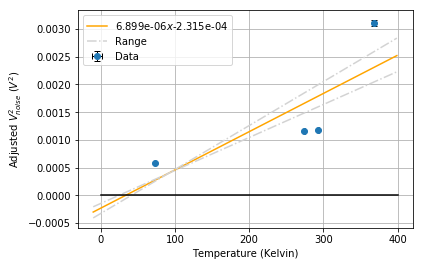

In [32]:
x = np.arange(-10,400)
plt.errorbar(temps+273.15, np.square(vtemp)-np.square(vinstT), 
             yerr= uVn2, xerr = utemps ,fmt='o',ecolor='black',
             elinewidth = 1,capsize = 3, label="Data")
plt.plot(x, slope*x+intercept, color='orange', 
         label = "{0:.3e}".format(slope)+'$x$'+"{0:.3e}".format(intercept))
plt.plot(x, minslope*x+minintercept, '-.',color='lightgrey', label = 'Range')
plt.plot(x, maxslope*x+maxintercept, '-.',color='lightgrey')
plt.legend()
# plt.plot(np.zeros(10), np.linspace(-10,10,10), color='black')
plt.plot(np.linspace(0,400,10), np.zeros(10), color='black')
plt.grid(True)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Adjusted $V_{noise}^2$ ($V^2$)")
# plt.savefig("./absolutezero_error.png", dpi=200)
plt.show()

In [33]:
T0 = -intercept/slope

In [34]:
uT0 = max(abs(T0-abs(minintercept/minslope)), abs(T0-abs(maxintercept/maxslope)))

In [36]:
print(T0, '+/-', uT0, 'K')

33.55319826856432 +/- 9.017032953343506 K
